In [8]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# IMPORTING THE DATASET TO BE USED

sales=pd.read_csv("C:/Users/MOORE/Desktop/Supermart Grocery Sales - Retail Analytics Dataset.csv",index_col='Order ID')
sales

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Order ID,,,,,,,,,,
OD1,Harish,Oil & Masala,Masalas,Vellore,11/8/2017,North,1254,0.12,401.28,Tamil Nadu
OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11/8/2017,South,749,0.18,149.80,Tamil Nadu
OD3,Hussain,Food Grains,Atta & Flour,Perambalur,6/12/2017,West,2360,0.21,165.20,Tamil Nadu
OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10/11/2016,South,896,0.25,89.60,Tamil Nadu
OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10/11/2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...
OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
OD9991,Alan,Bakery,Biscuits,Kanyakumari,7/12/2015,West,1195,0.26,71.70,Tamil Nadu
OD9992,Ravi,Food Grains,Rice,Bodi,6/6/2017,West,1567,0.16,501.44,Tamil Nadu


In [52]:
sales.columns

Index(['Customer Name', 'Category', 'Sub Category', 'City', 'Order Date',
       'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [53]:
# CHECKING THE DATATYPE FOR EACH COLUMNS

sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, OD1 to OD9994
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
 9   State          9994 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 858.9+ KB


In [54]:
# CHANGE THE DATE TYPE FROM OBEJECT TO DATE FORMAT

sales['Order Date']=pd.to_datetime(sales['Order Date'])

In [55]:
# CREATING A NEW COLUMN TO EXTRACT DAY_NAME

sales['Day_Name']=sales['Order Date'].dt.day_name()

In [56]:
# TO GET THE SALES PER DAY

Daysales=sales.groupby('Day_Name')['Sales'].sum()


In [57]:
# CALL THE VARIAABLE NAME

Daysales

Day_Name
Friday       1638367
Monday       2428324
Saturday     2724409
Sunday       2615647
Thursday      807635
Tuesday      2855751
Wednesday    1886849
Name: Sales, dtype: int64

In [58]:
# EXTRACTING THE VALUES AND INDEX FOR PLOTTING

Name=Daysales.index
Sales=Daysales.values


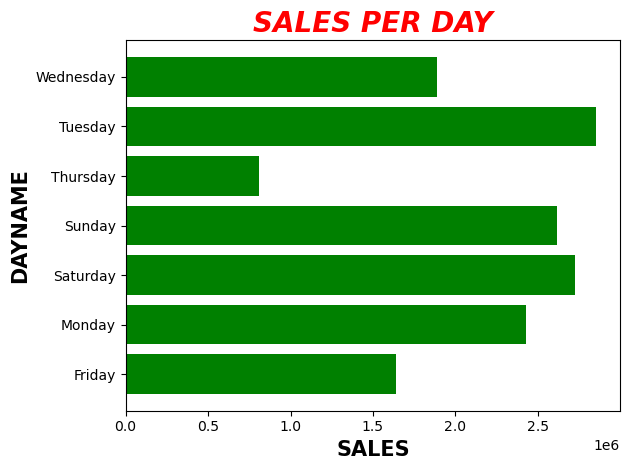

In [140]:
# PLOTTING THE CHART USING BARH 

plt.barh(Name,Sales,color='green')
plt.title('SALES PER DAY',fontstyle='oblique',fontweight='bold',c='r',fontsize=20)
plt.xlabel('SALES',fontweight='bold',fontsize=15)
plt.ylabel('DAYNAME',fontweight='bold',fontsize=15)
plt.tight_layout()
plt.show()

In [90]:
# GETTING THE TOP6 CUSTOMER BY SALES

Top6cust=sales.sort_values('Sales',ascending=False).head(6)
Top6cust

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day_Name
Order ID,,,,,,,,,,,
OD9852,Sundar,Beverages,Health Drinks,Cumbum,2018-10-12,Central,2500,0.25,325.0,Tamil Nadu,Friday
OD8250,Komal,Bakery,Cakes,Trichy,2016-07-31,South,2500,0.13,225.0,Tamil Nadu,Sunday
OD1413,Peer,Fruits & Veggies,Organic Vegetables,Kanyakumari,2015-12-12,West,2500,0.14,1025.0,Tamil Nadu,Saturday
OD9973,Vinne,Snacks,Chocolates,Perambalur,2018-02-20,West,2500,0.19,325.0,Tamil Nadu,Tuesday
OD2444,Ravi,Snacks,Chocolates,Dindigul,2018-10-30,Central,2500,0.33,300.0,Tamil Nadu,Tuesday
OD268,Arvind,Oil & Masala,Masalas,Virudhunagar,2017-01-22,East,2500,0.33,425.0,Tamil Nadu,Sunday


In [76]:
# USING GROUPBY TO GET THE SUM OF SALES BY THE TOP 6 CUSTOMERS

Top6=Top6cust.groupby('Customer Name')['Sales'].sum()

In [77]:
# CALL THE VARIABLE

Top6

Customer Name
Arvind    2500
Komal     2500
Peer      2500
Ravi      2500
Sundar    2500
Vinne     2500
Name: Sales, dtype: int64

In [78]:
# EXTRACTING THE INDEX AND VALUES FOR PLOTTING

Top=Top6.index
Saless=Top6.values

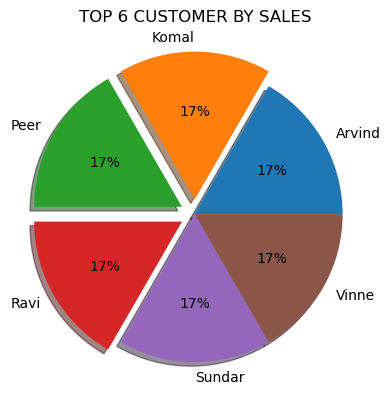

In [88]:
# PLOTTING OF PIE CHART USING THE ABOVE INDEX AND VALUES

plt.pie(Saless,labels=Top,autopct='%1.0f%%',shadow=True,explode=[0,0.1,0.1,0.1,0,0])
plt.title('TOP 6 CUSTOMER BY SALES')
plt.show()

In [91]:
# GETTING THE TOP10 CATEGORY BY SALES

Top10cat=sales.sort_values('Profit',ascending=False).head(10)
Top10cat

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day_Name
Order ID,,,,,,,,,,,
OD3160,Haseena,Bakery,Cakes,Cumbum,2017-09-04,Central,2491,0.26,1120.95,Tamil Nadu,Monday
OD3468,Verma,Fruits & Veggies,Fresh Fruits,Theni,2015-02-16,Central,2490,0.24,1120.50,Tamil Nadu,Monday
OD3437,Yadav,Bakery,Breads & Buns,Theni,2015-12-16,Central,2469,0.29,1111.05,Tamil Nadu,Wednesday
OD8135,Aditi,Bakery,Biscuits,Coimbatore,2016-09-18,East,2452,0.18,1103.40,Tamil Nadu,Sunday
OD9783,Komal,Snacks,Cookies,Karur,2017-03-29,Central,2450,0.21,1102.50,Tamil Nadu,Wednesday
OD1116,Vinne,"Eggs, Meat & Fish",Chicken,Madurai,2017-07-04,West,2439,0.30,1097.55,Tamil Nadu,Tuesday
OD4944,Willams,Beverages,Soft Drinks,Ramanadhapuram,2018-11-21,Central,2434,0.29,1095.30,Tamil Nadu,Wednesday
OD1305,Akash,Fruits & Veggies,Organic Vegetables,Salem,2017-12-01,East,2432,0.34,1094.40,Tamil Nadu,Friday
OD1808,Esther,Bakery,Biscuits,Trichy,2018-11-21,West,2429,0.11,1093.05,Tamil Nadu,Wednesday


In [99]:
# USING GROUPBY TO GET THE CATEGORY BY SUM OF PROFIT

Cat=Top6cust.groupby('Category')['Profit'].sum()
Cat

Category
Bakery               225.0
Beverages            325.0
Fruits & Veggies    1025.0
Oil & Masala         425.0
Snacks               625.0
Name: Profit, dtype: float64

In [100]:
# EXTRACTING THE INDEX AND VALUES FROM THE VARIABLE(Cat)

cats=Cat.index
num=Cat.values

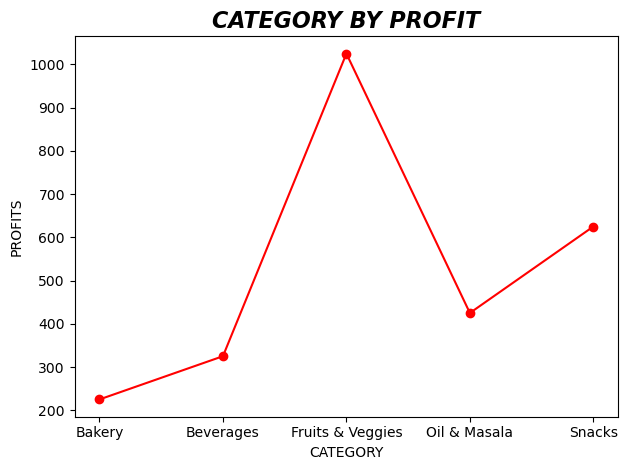

In [139]:
plt.plot(cats,num,color='r',marker='o')
plt.title('CATEGORY BY PROFIT',fontsize=16,fontweight='bold',fontstyle='oblique')
plt.xlabel('CATEGORY')
plt.ylabel('PROFITS')
plt.tight_layout()
plt.show()

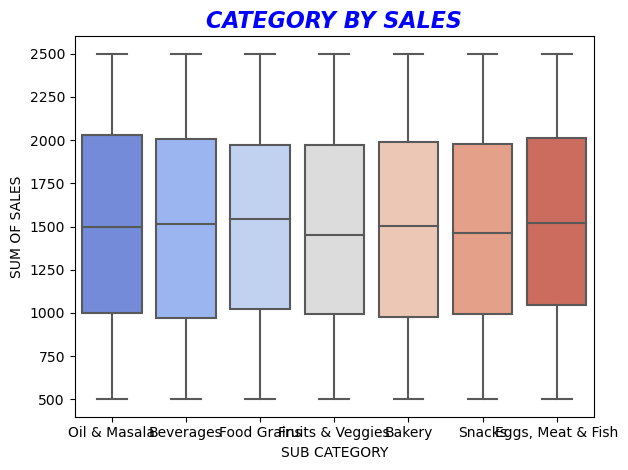

In [138]:
# plotting the chart with seaborn,while showing the range

sns.boxplot(x=sales['Category'],y=sales['Sales'],data=sales,palette='coolwarm')
plt.title('CATEGORY BY SALES',fontsize=16,fontweight='bold',fontstyle='italic',c='b')
plt.xlabel('SUB CATEGORY')
plt.ylabel('SUM OF SALES')
plt.tight_layout()

In [106]:
# SPLITTING THE YEAR FROM THE DATE(ORDER DATE)

sales['Year']=sales['Order Date'].dt.year

In [107]:
# GROUPPING THE YEAR BY THE NUMBER OF SALES 

Year=sales.groupby('Year')['Sales'].sum()

In [109]:
# EXTRACTING THE INDEX AND VALUE FROM THE GROUPED DATA 

yearna=Year.index
yearnum=Year.values

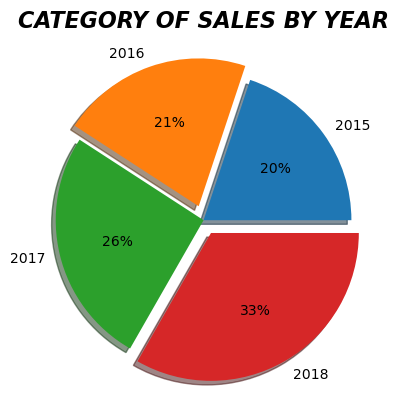

In [135]:
# PLOTTING WITH PIE CHART USING CATEGORY BY YEAR

plt.pie(yearnum,labels=yearna,autopct='%1.0f%%',shadow=True,explode=[0,0.1,0,0.1])
plt.title('CATEGORY OF SALES BY YEAR',fontsize=16,fontweight='bold',fontstyle='italic')
plt.show()

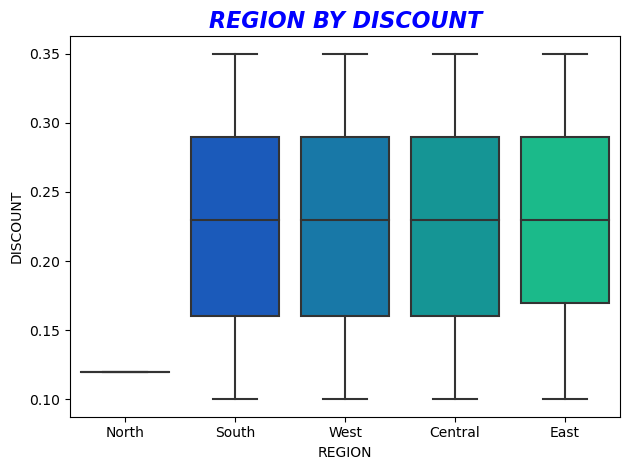

In [137]:
# plotting the chart with seaborn,while showing the range


sns.boxplot(x=sales['Region'],y=sales['Discount'],data=sales,palette='winter')
plt.title('REGION BY DISCOUNT',fontsize=16,fontweight='bold',fontstyle='italic',c='b')
plt.xlabel('REGION')
plt.ylabel('DISCOUNT')
plt.tight_layout()